Linear Regression
---

In [1]:
#Step 1 : load the data using numpy
import numpy as np
in_data = np.loadtxt('data100m.csv',delimiter=',')

# In CSV file first column contains year and second column winning time
# Extract data accordingly
x = in_data[:,0] # year
t = in_data[:,1] # winning time

In [2]:
#Step 2: plot the data using Matplot library
import pylab as plt
%matplotlib inline

Text(0,0.5,'Winning time')

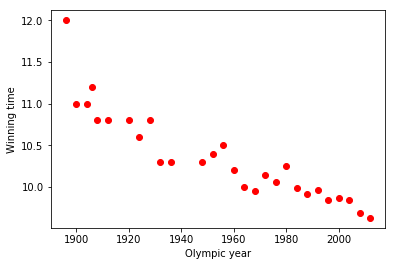

In [3]:
plt.plot(x,t,'ro')
#label the axes to ease the identification of data points
plt.xlabel('Olympic year')
plt.ylabel('Winning time')

In [5]:
#Step 3: compute the necessary values for  w0 and  w1
xbar = x.mean()
tbar = t.mean()
xxbar = (x*x).mean()
xtbar = (x*t).mean()

w_1 = (xtbar - xbar*tbar)/(xxbar - xbar*xbar)
w_0 = (t - w_1*x).mean()

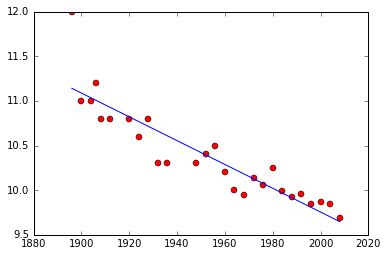

In [6]:
#Step 4: make the new plot
plt.figure()
plt.plot(x,t,'ro')
plt.plot([x[0],x[-1]],[w_0 + w_1*x[0],w_0 + w_1*x[-1]],'b')

Step 5: quadratic!
Derivation is theoretically easy but a pain as it involves solving a system of three simultaneous equations (we'll see how to make it easy next time). Probably the easiest way to do it is through gaussian elimination of the following matrix system (see e.g. [https://www.math.hmc.edu/calculus/tutorials/linearsystems/]()). The matrix system is obtained by differentiating with respect to $w_0$, $w_1$ and $w_2$.

$$ Aw = b $$

where

$$ A = \left[ \begin{array}{ccc} 1 & \bar{x} & \bar{x^2} \\
                                \bar{x} & \bar{x^2} & \bar{x^3} \\
                                \bar{x^2} & \bar{x^3} & \bar{x^4}
               \end{array}\right] $$
            
$$ w = \left[ \begin{array}{c} w_0 \\ w_1 \\ w_2 \end{array}\right] $$

and 

$$ b = \left[ \begin{array}{c} \bar{t} \\ \bar{xt} \\ \bar{x^2t} \end{array}\right] $$

and 

$$ \bar{f} = \frac{1}{N}\sum_{n=1}^N f_n $$

In [20]:
#Add more parameters to see how it will affect the curve/ prediction of future value 
tbar = t.mean()
xbar = x.mean()
x2bar = (x*x).mean()
x3bar = (x*x*x).mean()
x4bar = (x*x*x*x).mean()
x2tbar = (x*x*t).mean()

In [21]:
#Computed w2, w1 and w0 using derived formula - (Using calculus) - (check the link mentioned above)
num = x2tbar - x2bar*tbar - (x3bar-x2bar*xbar)*(xtbar-xbar*tbar)/(x2bar-xbar*xbar)
den = x4bar - x2bar*x2bar - (x3bar-x2bar*xbar)*(x3bar-x2bar*xbar)/(x2bar-xbar*xbar)
w_2 = num/den
print w_2
w_1 = (xtbar-xbar*tbar)/(x2bar-xbar*xbar) - w_3*(x3bar-xbar*x2bar)/(x2bar-xbar*xbar)
print w_1
w_0 = tbar - w_1*xbar - w_2*x2bar
print w_0

0.000110151552656
-0.443160488183
455.597858393


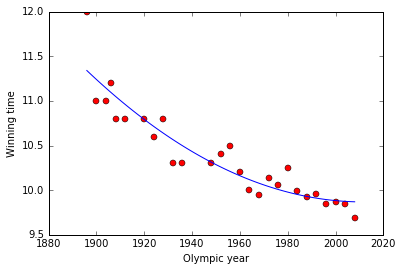

In [24]:
#Make the new plot
plt.figure()
xvals = np.linspace(x[0],x[-1],100)
tvals = w_0 + w_1*xvals + w_2*xvals**2
plt.plot(x,t,'ro')
plt.plot(xvals,tvals,'b')
plt.xlabel('Olympic year')
plt.ylabel('Winning time')